In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read df

In [2]:
def string_to_list(s):
    """ read strings as lists"""
    if (pd.isna(s)) or (s==''):
        return np.nan 
    
    # Use ast.literal_eval to safely evaluate string representations of lists
    try:
        parsed_list = ast.literal_eval(s)
    except (ValueError, SyntaxError):
        # Fallback in case of any parsing errors
        parsed_list = s.strip('[]').split(',')

    # Strip any extra whitespace and quotes
    return [item.strip().strip('"').strip("'") for item in parsed_list]


In [3]:
df = pd.read_csv('../Input/books_data.csv',
                       converters={
    'authors': string_to_list,
    'categories': string_to_list}
    )
print('shape: ',df.shape)
df.head() 

shape:  (212404, 10)


,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,[Julie Strain],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,[Comics & Graphic Novels],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,[Philip Nel],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,[Biography & Autobiography],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,[David R. Ray],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,[Religion],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,[Veronica Haddon],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,[Fiction],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,[Edward Long],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [5]:
df.describe(include='object')

# 1. Missing Data Analysis

In [4]:
missing_data = df.isnull().sum()
missing_data_percentage = (missing_data / len(df)) * 100

# Round the percentage to one decimal place
missing_data_percentage = missing_data_percentage.round(1)

# Create a dataframe to better visualize missing data
missing_data_df = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_data_percentage
}).sort_values(by='Missing Values', ascending=False)

# Display missing data summary
print("Missing Data Analysis:")
print(missing_data_df)

Missing Data Analysis:
               Missing Values  Percentage
ratingsCount           162652        76.6
publisher               75886        35.7
description             68442        32.2
image                   52075        24.5
categories              41199        19.4
authors                 31413        14.8
publishedDate           25305        11.9
previewLink             23836        11.2
infoLink                23836        11.2
Title                       1         0.0


# 2. Duplicate Records

In [4]:
duplicate_records = df.duplicated(subset='Title', keep=False)
duplicate_count = duplicate_records.sum()
# Display the number of duplicate records
print(f"\nNumber of duplicate records: {duplicate_count}")



Number of duplicate records: 0


# 3. Distribution


## ratingsCount

In [100]:
q1 = df['ratingsCount'].quantile(0.25)
q3 = df['ratingsCount'].quantile(0.75)
iqr = q3 - q1

# Calculate lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
outliers = df[(df['ratingsCount'] < lower_bound) | (df['ratingsCount'] > upper_bound)]

# Calculate mean and median
count = df['ratingsCount'].sum()
mean = df['ratingsCount'].mean()
median = df['ratingsCount'].median()

# Print the results
print(f"Sum ratingsCount: {int(count)}")
print(f"Mean of ratingsCount: {mean.round(2)}")
print(f"Median of ratingsCount: {median}")
print(f"Q1 (25th percentile): {q1}")
print(f"Q3 (75th percentile): {q3}")
print(f"Number of outliers: {len(outliers)}")

print("ratingsCount IS != FROM DF_RATINGS.SHAPE[0]")

Sum ratingsCount: 1057378
Mean of ratingsCount: 21.25
Median of ratingsCount: 2.0
Q1 (25th percentile): 1.0
Q3 (75th percentile): 5.0
Number of outliers: 6162


## authors

Authors Description
count    153056.000000
mean          1.503391
std           2.303315
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         236.000000
Name: count, dtype: float64


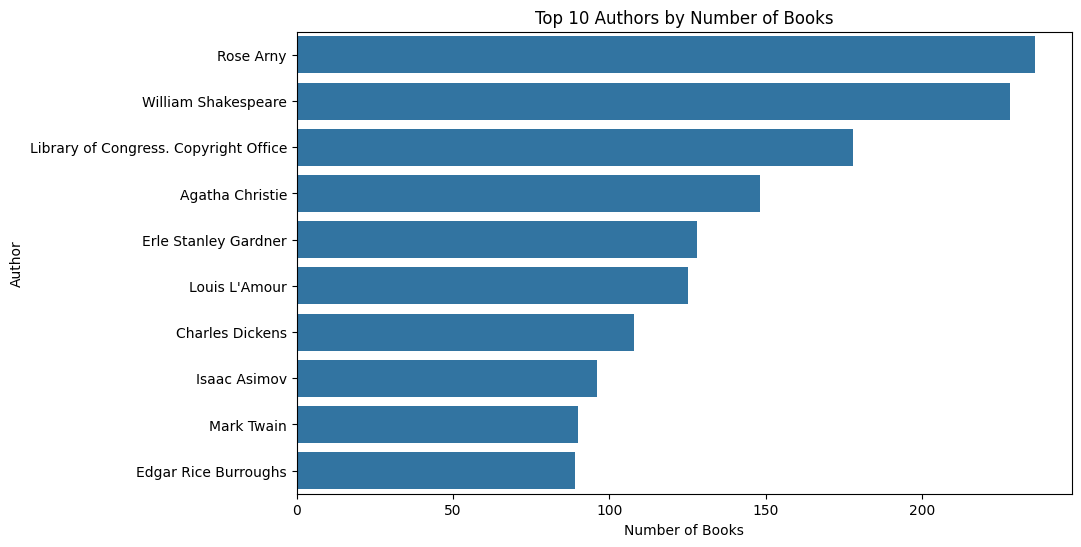

In [11]:
# Exploding the authors list to handle multiple authors per book
df_authors = df.explode('authors')

# Counting the number of books per author
author_counts = df_authors['authors'].value_counts()
print("Authors Description")
print(author_counts.describe())

# Top 10 Authors Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=author_counts.head(10).values, y=author_counts.head(10).index)
plt.title('Top 10 Authors by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()

# categories

Category Description
count    10883.000000
mean        15.731416
std        300.948680
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max      23419.000000
Name: count, dtype: float64


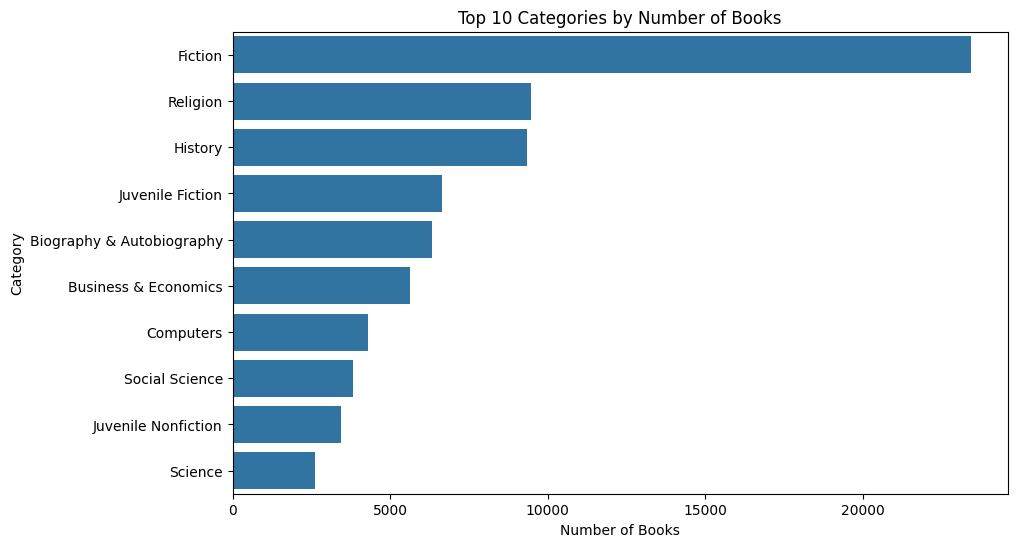

In [8]:
# Exploding the categories list to handle multiple categories per book
df_categories = df.explode('categories')

# Counting the number of books per category
category_counts = df_categories['categories'].value_counts()
print("Category Description")
print(category_counts.describe())

# Top 10 Categories Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.head(10).values, y=category_counts.head(10).index)
plt.title('Top 10 Categories by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Category')
plt.show()

## publisher

Publisher Description
count    16016.000000
mean         8.523851
std         59.802743
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       3454.000000
Name: count, dtype: float64


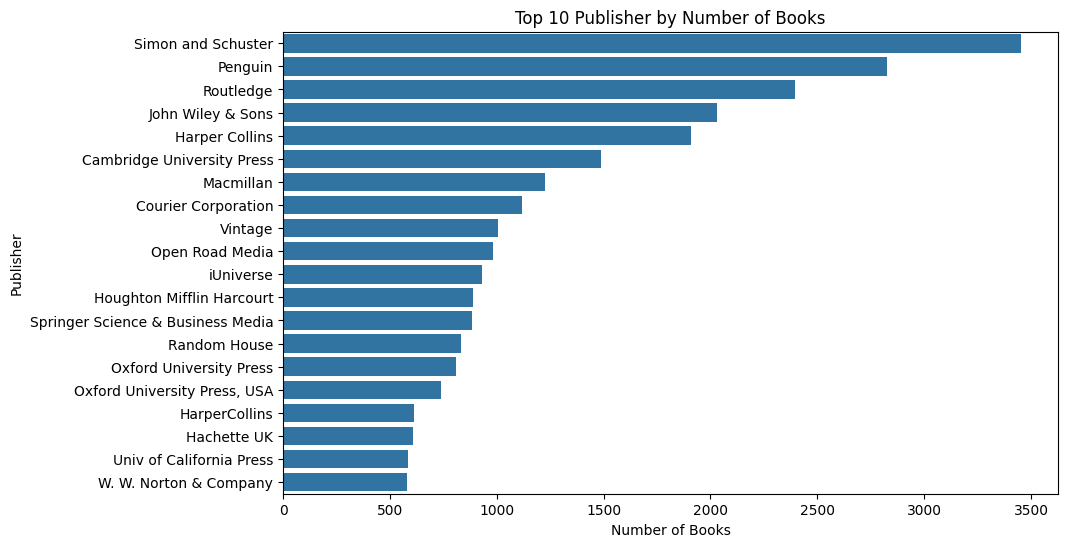

In [13]:
# Counting the number of books per publisher
publisher_counts = df['publisher'].value_counts()

print("Publisher Description")
print(publisher_counts.describe())

# Top 10 publisher Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=publisher_counts.head(20).values, y=publisher_counts.head(20).index)
plt.title('Top 10 Publisher by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Publisher')
plt.show()


#  2 variables

# category publisher

In [17]:
df_categories['categories_grouped'] = df_categories['categories'].apply(lambda x: x if x in category_counts.head(10).index else 'Other')


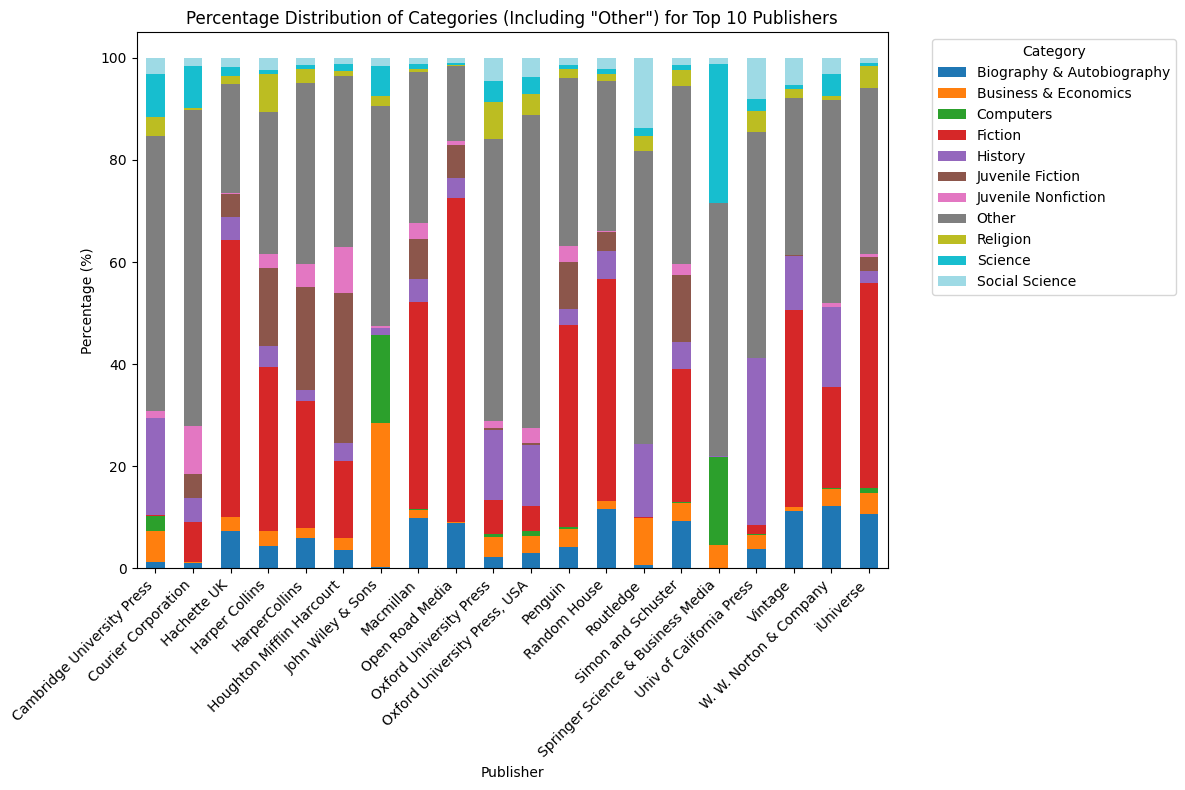

In [20]:


# Filter the dataframe to include only the top 10 publishers
top_publishers_df = df_categories[df_categories['publisher'].isin(publisher_counts.head(20).index)]



# Calculate the count of each grouped category for each top publisher
category_distribution = top_publishers_df.groupby(['publisher', 'categories_grouped']).size().unstack(fill_value=0)

category_percentage = category_distribution.div(category_distribution.sum(axis=1), axis=0) * 100


# Plot the percentage distribution using a stacked bar chart
category_percentage.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab20')

plt.title('Percentage Distribution of Categories (Including "Other") for Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Percentage (%)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()
